# Ejercicio Módulo 6 - Detector de SPAM
**Inteligencia Artificial - CEIA - FIUBA**

**Damián Smilovich**

Uno de los problemas más comunes en clasificación es la detección de correos electrónicos no deseados (SPAM). Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo (Naive Bayes). La detección de SPAM sigue siendo un desafío en el mundo digital, ya que los emisores de este tipo de mensajes continúan adaptando sus estrategias para evadir los filtros.

Además del clasificador de Bayes ingenuo, se han desarrollado y aplicado técnicas más avanzadas, como algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este ejercicio utilizaremos un conjunto de datos que contiene 4601 observaciones de correos electrónicos, de los cuales 2788 son legítimos y 1813 son SPAM. Dado que el contenido de los correos es un tipo de dato no estructurado, es necesario procesarlo. En este caso, el dataset ya ha sido preprocesado utilizando técnicas típicas de Procesamiento de Lenguaje Natural (NLP), como el conteo de la frecuencia de palabras observadas en los mensajes.

El procesamiento de lenguaje natural desempeña un rol fundamental en la detección de SPAM, ya que permite analizar el contenido textual y extraer características relevantes para la clasificación. Además del simple conteo de palabras, pueden aplicarse técnicas más sofisticadas, como la extracción de características semánticas o el análisis de sentimientos, para mejorar la precisión de los modelos.

En este dataset, se contabiliza la cantidad de ocurrencias de cada palabra en los distintos correos:

![spam counter](./spam.png)

Para preservar la privacidad de los mensajes, las frecuencias han sido normalizadas. El dataset está compuesto por 54 columnas de atributos denominadas:

- `word_freq_XXXX`: donde `XXXX` representa una palabra o símbolo. Los valores son enteros que van de 0 a 20.000.

Adicionalmente, incluye una columna llamada `spam`, que toma el valor 1 si el correo es SPAM, y 0 si es legítimo.

Los clasificadores de Bayes ingenuos fueron de los primeros filtros utilizados por las aplicaciones de correo electrónico. Se basan en el siguiente principio: partiendo de una probabilidad a priori de que un correo sea SPAM, la aparición de ciertas palabras puede modificar esa probabilidad a posteriori, indicando con mayor o menor certeza si un mensaje es o no SPAM.

### Carga del dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("dataset/spambase.csv") # Cargamos los datos desde un archivo CSV
dataset.head(10)

X = dataset.iloc[:, :-1] # Seleccionamos todas las filas y todas las columnas menos la última como características
y = dataset.iloc[:, -1]  # Seleccionamos todas las filas y solo la última columna como etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Dividimos los datos en conjuntos de entrenamiento y prueba

### Armado de modelos

En esta sección completaremos las partes que faltan:

- Cree una regresión logística utilizando un **Pipeline** de scikit-learn que incluya una etapa de estandarización de los atributos.
- Cree un modelo de **Bayes ingenuo** (sin aplicar normalización). Seleccione la implementación que considere más apropiada para este problema de entre las que ofrece scikit-learn.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Creamos el pipeline de regresion logistica
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns)
    ]
)

log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LogisticRegression()),
])

# Creamos el modelo Bayesiano Ingenuo
naive_bayes = MultinomialNB()


# Entrenamos los modelos
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### Evaluación de modelos:

Para cada modelo, utilizando el dataset de evaluación, calcule:

- La **matriz de confusión**
- La **precisión (precision)** y la **recuperación (recall)**
- El **AUC (Área Bajo la Curva ROC)**

#### Regresión Logística

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluamos el modelo de regresion logistica
y_pred_logreg = log_reg.predict(X_test)
y_prob_logreg = log_reg.predict_proba(X_test)[:, 1]

# Calculamos las métricas
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

print('Regresión Logística:')
print(f'  Precisión: {precision_logreg}')
print(f'  Recall: {recall_logreg}')
print(f'  AUC: {roc_auc_logreg}')

Regresión Logística:
  Precisión: 0.9383177570093458
  Recall: 0.8700173310225303
  AUC: 0.9144862774515636


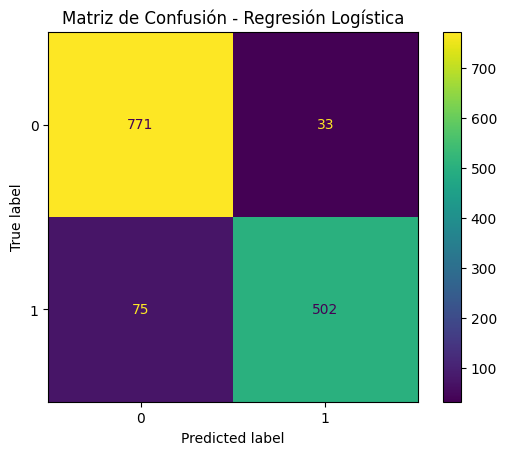

In [31]:
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot()
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

#### Modelo Bayesiano Ingenuo

In [32]:
# Evaluamos el modelo naive-bayes
y_pred_nb = naive_bayes.predict(X_test)
y_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]

cm_nb = confusion_matrix(y_test, y_pred_nb) 
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)

print('Naive Bayes:')
print(f'  Precisión: {precision_nb}')
print(f'  Recall: {recall_nb}')
print(f'  AUC: {roc_auc_nb}')

Naive Bayes:
  Precisión: 0.7827926657263752
  Recall: 0.9618717504332756
  AUC: 0.8851647309380308


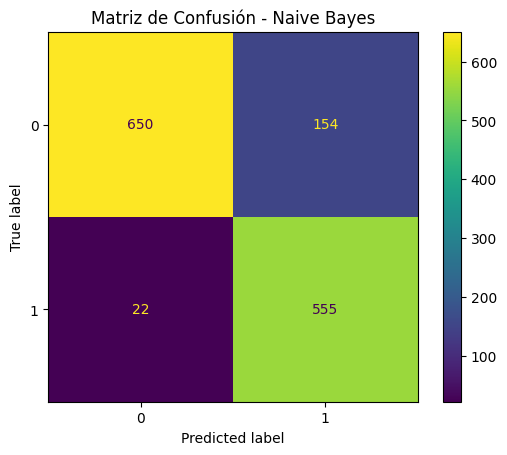

In [33]:
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

Completa la tabla de métricas:

| Modelo                        | Precision | Recall | AUC | 
| ----------------------------- | --- | --- | ----- |
| Regresión Logistica              |   0.938  |  0.870   |   0.914    |
| Naive Bayes |   0.783  |   0.961  |   0.885    |


### Preguntas:

¿Cuál es el mejor modelo según cada métrica?

- Precision: Regresión logística
- Recall: Bayes
- AUC: Regresión logística

Viendo la matriz de confusión, ¿qué tipo de error comete más cada modelo?

- Regresión logística: la tasa de **falsos negativos** (0.13) es mayor a la de falsos positivos (0.047)
- Modelo Bayes ingenuo: la tasa de **falsos positivos** (0.191) es mayor a la de falsos positivos (0.038)

Según tu opinión, ¿cuál de los dos tipos de error considerás más importante en este problema?

Es peor un **falso positivo**, ya que clasificar como spam algo que no lo es, es más crítico que que se filtre un correo spam.
En ese sentido el modelo de Bayes resulta terrible comparativamente a regresión logística.